# LeNet 5 Pytorch Implementation

Research Paper Link :- https://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

![LeNet5 Architecture](https://upload.wikimedia.org/wikipedia/commons/3/35/LeNet-5_architecture.svg)

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

##  Define LeNet-5 Model Architecture

In [2]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # (28x28 -> 28x28)
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)  # (28x28 -> 14x14)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)  # (14x14 -> 10x10)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(self.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = self.relu(self.fc1(x))  # Fully Connected Layer 1 -> ReLU
        x = self.relu(self.fc2(x))  # Fully Connected Layer 2 -> ReLU
        x = self.fc3(x)  # Fully Connected Layer 3 (Output)
        return x

## Hyperparameters

In [3]:
batch_size = 64
epochs = 10
learning_rate = 0.001

## Data Loading and Transformation

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.76MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Model, Loss, and Optimizer

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Model Training & Evaluation

In [6]:
# Training Loop
train_losses, test_accuracies = [], []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

    # Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Accuracy on test set: {accuracy:.2f}%')

Epoch [1/10], Loss: 0.2728
Accuracy on test set: 97.10%
Epoch [2/10], Loss: 0.0767
Accuracy on test set: 98.30%
Epoch [3/10], Loss: 0.0534
Accuracy on test set: 98.61%
Epoch [4/10], Loss: 0.0432
Accuracy on test set: 98.09%
Epoch [5/10], Loss: 0.0359
Accuracy on test set: 98.33%
Epoch [6/10], Loss: 0.0308
Accuracy on test set: 99.12%
Epoch [7/10], Loss: 0.0250
Accuracy on test set: 98.96%
Epoch [8/10], Loss: 0.0216
Accuracy on test set: 98.99%
Epoch [9/10], Loss: 0.0182
Accuracy on test set: 98.72%
Epoch [10/10], Loss: 0.0175
Accuracy on test set: 98.88%


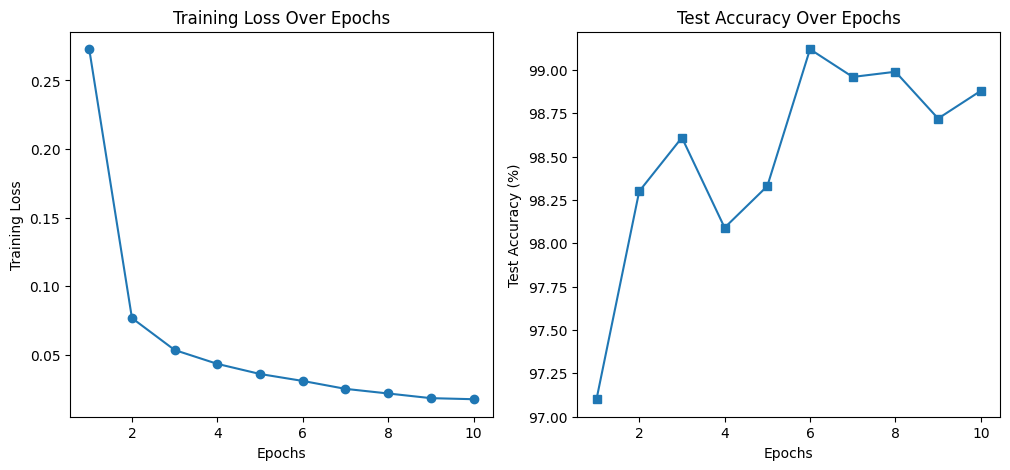

In [7]:
# Plot Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), test_accuracies, marker='s', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.show()

In [8]:
# Inference Function
def predict_image(image):
    model.eval()
    with torch.no_grad():
        image = image.to(device).unsqueeze(0)  # Add batch dimension
        output = model(image)
        _, predicted = torch.max(output, 1)
    return predicted.item()



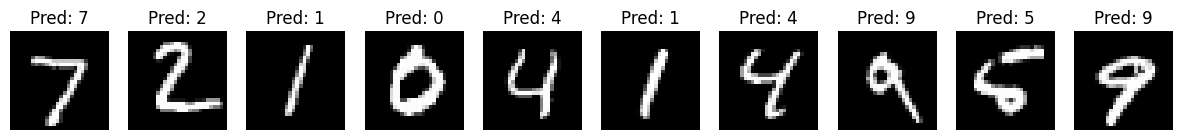

In [9]:
# Visualizing Predictions
samples, labels = next(iter(test_loader))
samples, labels = samples.to(device), labels.to(device)
predictions = [predict_image(img) for img in samples[:10]]

fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(samples[i].cpu().squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predictions[i]}')
    ax.axis('off')
plt.show()